In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
summary = df.describe(include='all')
nan_counts = df.isna().sum()
summary.loc['NaN Count'] = nan_counts
summary

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

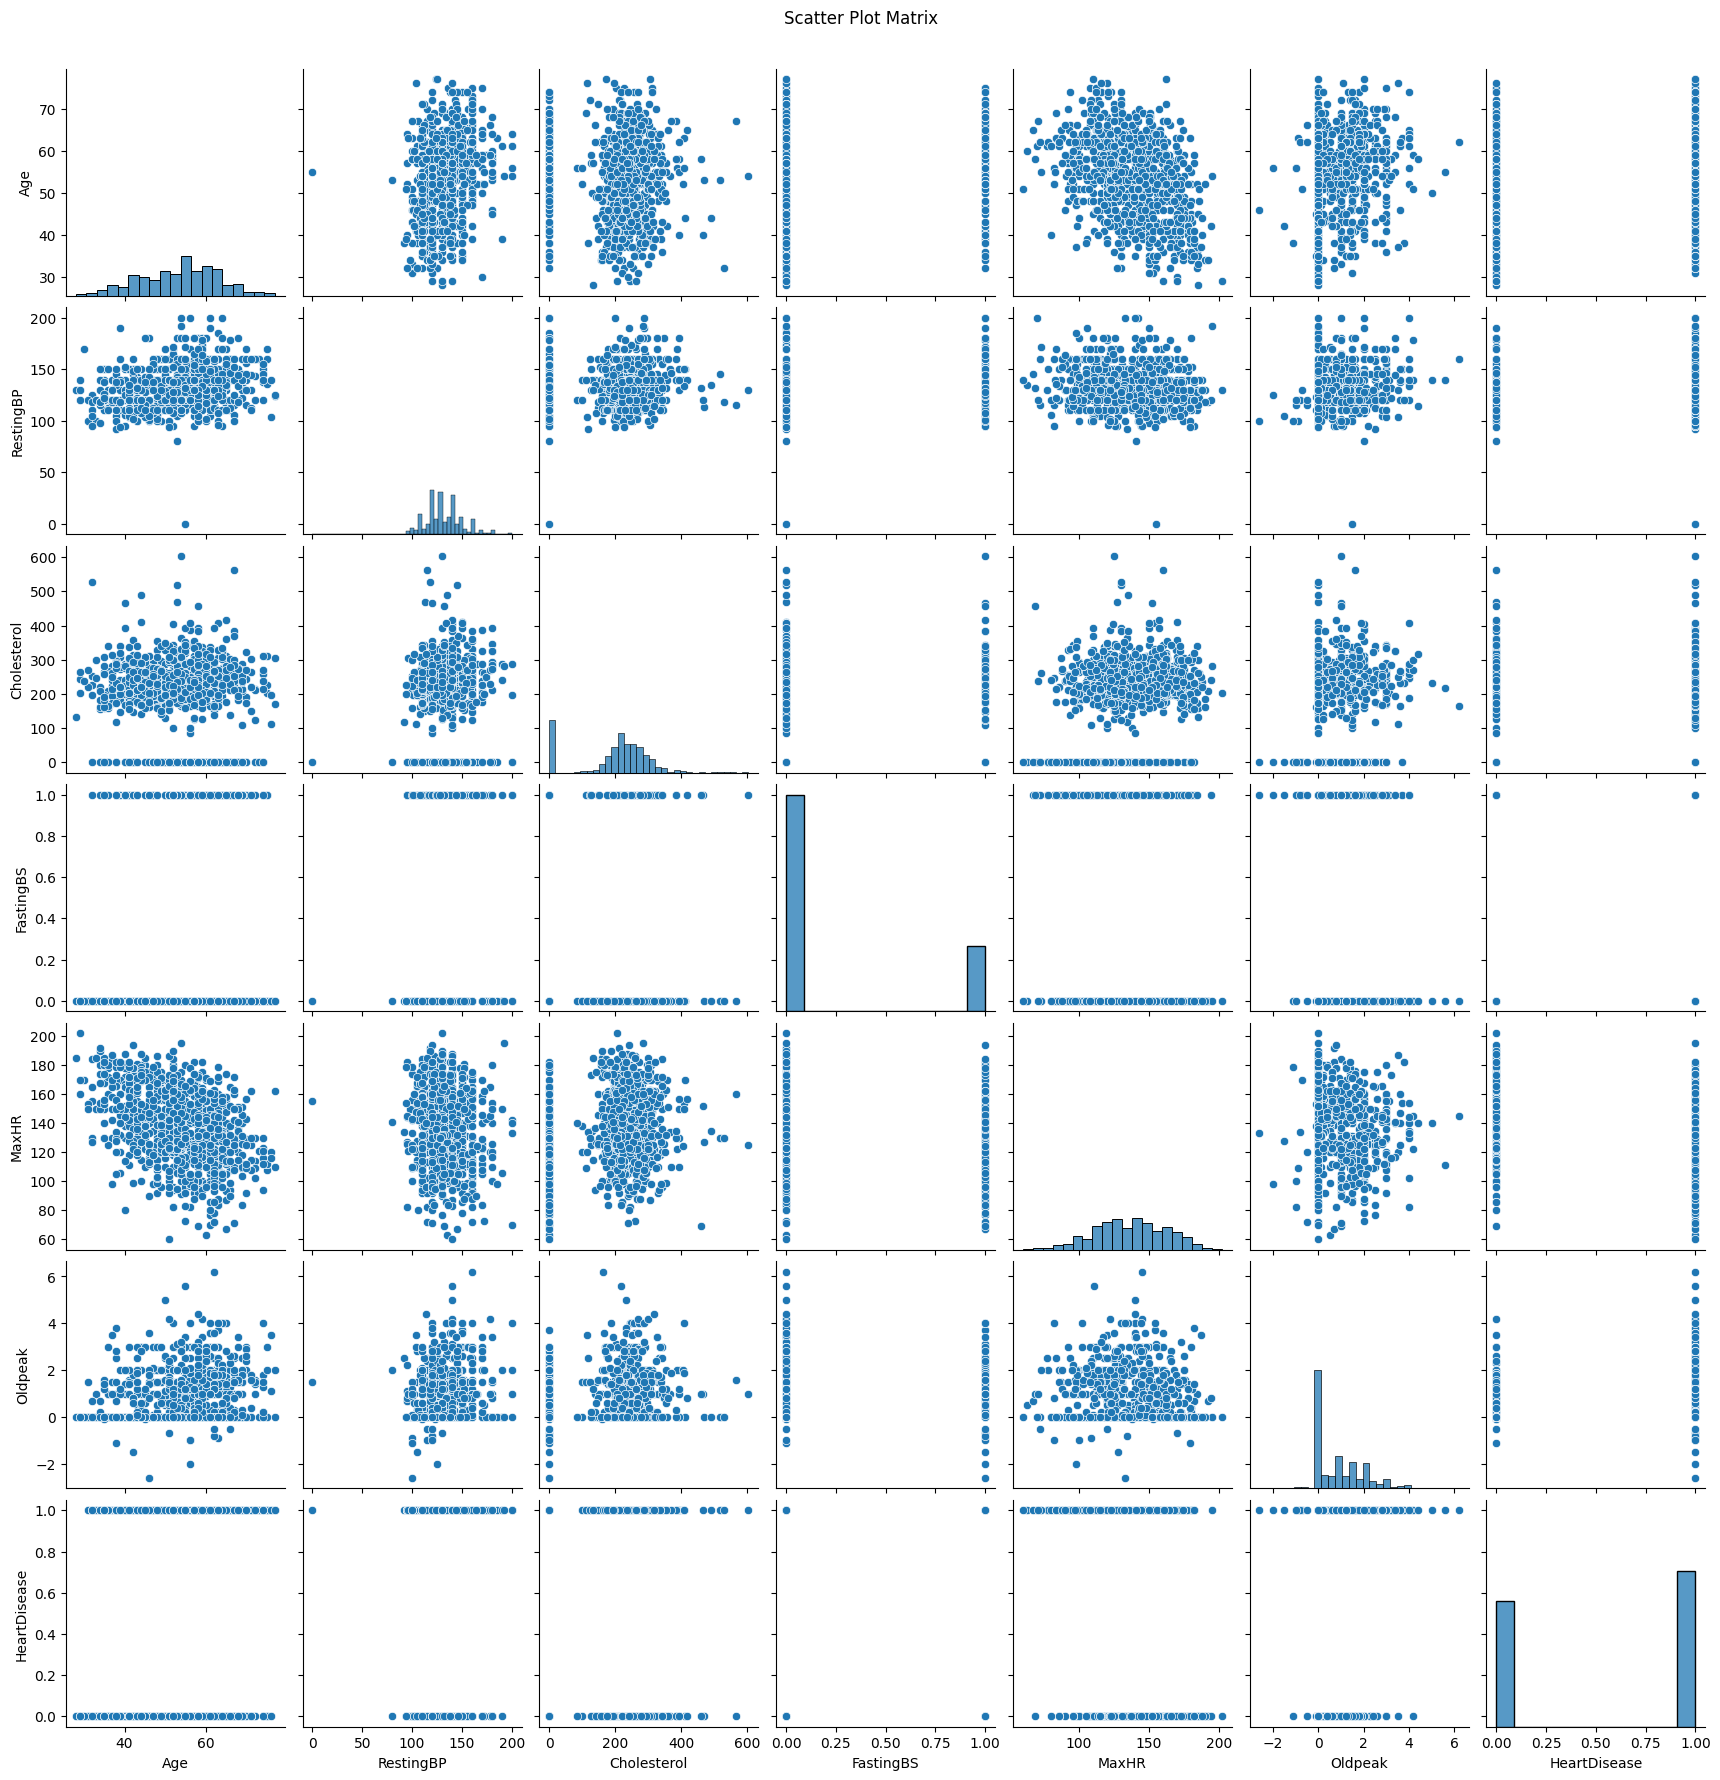

In [9]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.savefig('scatterPlot_matrix.png')

In [6]:
df.iloc[1]

Age                   49
Sex                    F
ChestPainType        NAP
RestingBP            160
Cholesterol          180
FastingBS              0
RestingECG        Normal
MaxHR                156
ExerciseAngina         N
Oldpeak              1.0
ST_Slope            Flat
HeartDisease           1
Name: 1, dtype: object

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
discrete_features = ['HeartDisease', 'Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG']
features = df.drop(discrete_features, axis=1)
features.iloc[0]

Age             40.0
RestingBP      140.0
Cholesterol    289.0
FastingBS        0.0
MaxHR          172.0
Oldpeak          0.0
Name: 0, dtype: float64

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

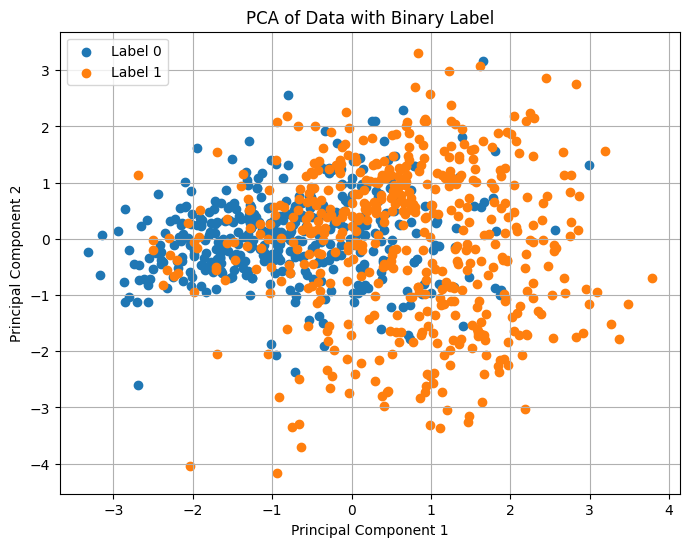

In [11]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Label'] = df['HeartDisease']

# Plot the results with color-coding based on the label
plt.figure(figsize=(8, 6))
for label in principal_df['Label'].unique():
    plt.scatter(principal_df.loc[principal_df['Label'] == label, 'PC1'],
                principal_df.loc[principal_df['Label'] == label, 'PC2'],
                label=f'Label {label}')
plt.title('PCA of Data with Binary Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df.iloc[:2]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [13]:
df_encoded = pd.get_dummies(df, columns=discrete_features, drop_first=True)

In [14]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease_1,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,False,True,True,False,False,False,False,True,True,False
1,49,160,180,0,156,1.0,True,False,False,True,False,False,True,False,True,False
2,37,130,283,0,98,0.0,False,True,True,False,False,False,False,True,False,True
3,48,138,214,0,108,1.5,True,False,False,False,False,True,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,True,False,False,False,True,True,False


In [15]:
features = df_encoded.drop('HeartDisease_1', axis=1)
labels = df_encoded['HeartDisease_1']

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Label'] = labels

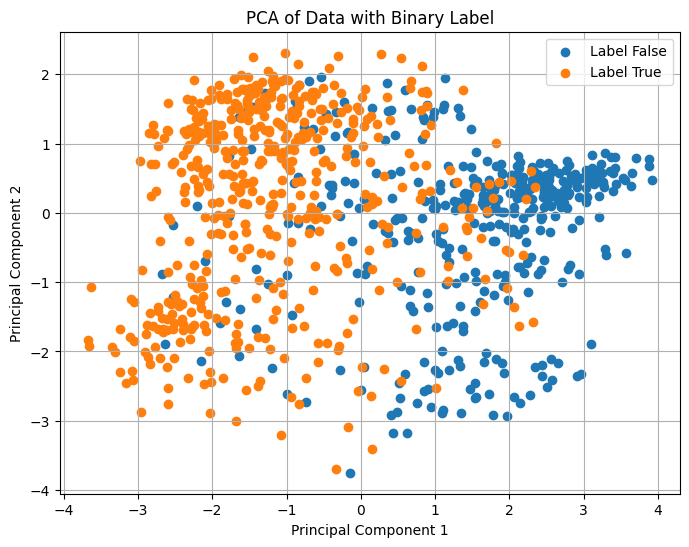

In [17]:
plt.figure(figsize=(8, 6))
for label in principal_df['Label'].unique():
    plt.scatter(principal_df.loc[principal_df['Label'] == label, 'PC1'],
                principal_df.loc[principal_df['Label'] == label, 'PC2'],
                label=f'Label {label}')
plt.title('PCA of Data with Binary Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease_1', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'RestingECG_Normal', 'RestingECG_ST'],
      dtype='object')

In [38]:
df = df_encoded.applymap(lambda x: 1 if isinstance(x, bool) and x else (0 if isinstance(x, bool) and not x else x))

print(df)

X = df.drop('HeartDisease_1', axis=1)
y = df['HeartDisease_1']


     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease_1  \
0     40        140          289          0    172      0.0               0   
1     49        160          180          0    156      1.0               1   
2     37        130          283          0     98      0.0               0   
3     48        138          214          0    108      1.5               1   
4     54        150          195          0    122      0.0               0   
..   ...        ...          ...        ...    ...      ...             ...   
913   45        110          264          0    132      1.2               1   
914   68        144          193          1    141      3.4               1   
915   57        130          131          0    115      1.2               1   
916   57        130          236          0    174      0.0               1   
917   38        138          175          0    173      0.0               0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  C

C:\Users\elmow\AppData\Local\Temp\ipykernel_36524\2481226774.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df_encoded.applymap(lambda x: 1 if isinstance(x, bool) and x else (0 if isinstance(x, bool) and not x else x))


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8478260869565217
Confusion Matrix:
 [[66 11]
 [17 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



c:\Users\elmow\anaconda3\envs\optim\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
